<a href="https://colab.research.google.com/github/nan-park/section1_project/blob/main/AI_section1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Topic***

**다음 분기에 어떤 게임을 설계해야 할까**

*   지역에 따라서 선호하는 게임 장르가 다를까
*   연도별 게임의 트렌드가 있을까
*   출고량이 높은 게임에 대한 분석 및 시각화 프로세스 포함

In [2]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
# 파일 다운로드
url = "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv"
df = pd.read_csv(url)
df.head(10)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [5]:
files.upload(); # vgsales.csv

Saving vgsales.csv to vgsales.csv


In [6]:
# 외부 데이터셋(Kaggle) (https://www.kaggle.com/datasets/gregorut/videogamesales)
df_kaggle = pd.read_csv('vgsales.csv')
df_kaggle.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


# **1. 전처리(Preprocessing)**

In [59]:
df_clean = df.copy()
df_clean = df_clean.drop('Unnamed: 0', axis=1)  # 필요 없는 컬럼 삭제
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [60]:
# 결측치 처리(Year, Genre, Publisher)
# Platform: Category로 변경, Year: int로 변경,  Genre: unique 살펴보고 필요하다면 category로 변경, # 각종 Sales: 0을 결측치로 생각하고 제거해야 할지 생각하기/ K, M 값 처리하기
# 중복값 확인

In [61]:
df_clean.Platform.unique()  # Platform 31가지

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [62]:
df_clean.Genre.unique() # Genre 12가지(NaN 미포함)

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter', nan], dtype=object)

In [63]:
# Sales 값 float로 바꾸기
sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
# K, M 값 존재
# K = 1,000 / M = 1,000,000
# default M 단위
# K => data/1000. M => data 그대로.

for col in sales:
  df_clean[col] = df_clean[col].astype(str)
  
  k_condition = df_clean[col].str.contains('K')
  df_clean.loc[k_condition, col] = df_clean[k_condition][col].str.replace('K', '').astype(float)/1000
  df_clean[col] = df_clean[col].astype(str)

  m_condition = df_clean[col].str.contains('M')
  df_clean.loc[m_condition, col] = df_clean[m_condition][col].str.replace('M', '')

  df_clean[col] = df_clean[col].astype(float)


In [64]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


*  **중복값 제거**




In [65]:
df_clean[df_clean.duplicated(keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8055,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0


In [66]:
df_clean = df_clean.drop_duplicates(ignore_index=True)  # 아예 동일한 중복값 제거

In [67]:
df_clean[df_clean.duplicated(subset=['Name', 'Platform'], keep=False)].sort_values(by='Name') # Year까지 같으면 중복값으로 취급. 합계로 계산하기

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7346,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.23,0.00,0.22
8717,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.00,0.01,0.00,0.00
1318,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.80,0.01,0.15
2673,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.05
12528,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.17,0.02,0.10
13807,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0.00,0.06,0.00,0.02
8651,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00
15704,Sonic the Hedgehog,PS3,2006.0,Platform,Sega,0.41,0.07,0.04,0.66


In [68]:
# Name, Platform 동일한데 Year이 NaN인 데이터는 NaN이 아닌 값에 합치기(index 8651)
drop_index = []
df_duplicated = df_clean[df_clean.duplicated(subset=['Name', 'Platform'], keep=False)]
for index in df_duplicated.index:
  if np.isnan(df_duplicated.loc[index].Year): # isnull() 쓰면 error 발생
    name = df_duplicated.loc[index].Name
    platform = df_duplicated.loc[index].Platform
    df_exist = df_duplicated.query("Platform == @platform and Name == @name") # 존재한다고 전제
    # sum
    for col in sales:
      df_clean.loc[df_exist.index, col] = df_exist[col] + df_duplicated.loc[index][col]
    drop_index.append(index)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [69]:
df_clean = df_clean.drop(drop_index).reset_index(drop=True)

In [70]:
duplicated = df_clean[df_clean.duplicated(subset=['Name', 'Platform'], keep=False)].sort_values(by='Name') # Name, Platform, Year이 같으면 중복으로 취급 -> sum

In [71]:
df_temp = df_clean.copy()

In [72]:
# 중복치 후보 중 Name, Platform, Year이 일치하면 같은 작품으로 생각하고 sales 값을 더한다
for col in sales:
  df_temp.loc[duplicated.index, col] = duplicated.groupby(['Name', 'Platform', 'Year'])[col].transform('sum')

df_temp = df_temp.drop_duplicates().reset_index(drop=True)

In [73]:
df_temp[df_temp.duplicated(subset=['Name', 'Platform'], keep=False)].sort_values(by='Name')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1318,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.80,0.01,0.15
2673,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.05
12526,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.17,0.02,0.10
13805,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0.00,0.06,0.00,0.02


In [74]:
df_clean = df_temp

*  **Year 이상치 수정**

In [75]:
df_clean.describe() # Year이 0인 값이 존재

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16326.000000,16595.000000,16595.000000,16595.000000,16595.000000
mean,1994.241455,0.264715,0.146679,0.077795,0.048072
std,155.081855,0.816749,0.505397,0.309317,0.188604
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


In [76]:
# df_clean[df_clean.Year<1900]
df_clean.loc[df_clean.Year==0, 'Year'] = np.nan # Year==0인 값은 결측치로 간주

index_out = df_clean[df_clean.Year<1900].index  # 확인용

df_clean.loc[df_clean.Year<10, 'Year'] = ('200' + df_clean[df_clean.Year<10].Year.astype(str)).astype(float)
df_clean.loc[df_clean.Year<20, 'Year'] = ('20'+ df_clean[df_clean.Year<20].Year.astype(str)).astype(float)
df_clean.loc[df_clean.Year<1900, 'Year'] = ('19' + df_clean[df_clean.Year<1900].Year.astype(str)).astype(float)

df_clean.iloc[index_out].head(10)

# NaN 값 마저 없앤 다음에 int로 바꿔주기

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
74,Age of Empires III: Complete Collection,PC,2009.0,Strategy,Microsoft Game Studios,0.01,0.12,0.00,0.03
81,Treasures of the Deep,PS,1997.0,Action,Namco Bandai Games,0.10,0.07,0.00,0.01
213,NASCAR Unleashed,PS3,2011.0,Racing,Activision,0.09,0.00,0.00,0.01
304,Kung Fu Panda: Showdown of Legendary Legends,PS3,2015.0,Action,Little Orbit,0.00,0.02,0.00,0.00
768,NASCAR Thunder 2004,PS2,2003.0,Racing,Electronic Arts,0.53,0.41,0.00,0.14
906,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,1996.0,Racing,ASCII Entertainment,0.00,0.00,0.90,0.00
1015,Wolfenstein,PC,2009.0,Shooter,Activision,0.01,0.03,0.00,0.01
1220,Ratchet & Clank: Going Commando,PS2,2003.0,Platform,Sony Computer Entertainment,1.44,0.83,0.26,0.25
1364,LEGO Star Wars II: The Original Trilogy,PS2,2006.0,Action,LucasArts,1.85,0.64,0.01,0.19
1409,Rogue Warrior,PS3,2009.0,Shooter,Bethesda Softworks,0.11,0.02,0.00,0.01


*  **결측치 처리**



In [77]:
df_clean.info() # Year, Genre, Publisher

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16595 entries, 0 to 16594
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16595 non-null  object 
 1   Platform     16595 non-null  object 
 2   Year         16323 non-null  float64
 3   Genre        16545 non-null  object 
 4   Publisher    16538 non-null  object 
 5   NA_Sales     16595 non-null  float64
 6   EU_Sales     16595 non-null  float64
 7   JP_Sales     16595 non-null  float64
 8   Other_Sales  16595 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB




1.  장르(Genre) 결측치


In [78]:
# Genre 결측치 채우기
genre_missing = df_clean[df_clean.Genre.isnull()] # 50개

In [79]:
# df_kaggle 외부 데이터에서 장르 결측치 채우기
name_list = list(genre_missing.Name)
kaggle_genre = df_kaggle[df_kaggle.Name.isin(name_list)]
kaggle_genre.duplicated(subset=['Name']).sum(), kaggle_genre.duplicated(subset=['Name', 'Genre']).sum() # Name 같으면 Genre도 동일함

(48, 48)

In [80]:
drop_index = kaggle_genre[kaggle_genre.duplicated(subset=['Name', 'Genre'])==True].index
kaggle_genre = kaggle_genre.drop(drop_index)

In [81]:
for name in name_list:
  df_clean.loc[df_clean.Name==name, 'Genre'] = kaggle_genre[kaggle_genre.Name==name].Genre.values[0]

In [82]:
df_clean.iloc[genre_missing.index].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
50,Ape Escape: On the Loose,PSP,2005.0,Platform,Sony Computer Entertainment,0.52,0.01,0.12,0.05
408,NBA Ballers,XB,2004.0,Sports,Midway Games,0.37,0.11,0.00,0.02
1328,NFL Street,XB,2004.0,Sports,Electronic Arts,0.49,0.15,0.00,0.02
1582,SingStar Singalong With Disney,PS2,2008.0,Misc,Sony Computer Entertainment,0.00,0.04,0.00,0.57
1971,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.17,4.05,4.34,0.79


2. Publisher 결측치

In [83]:
df_temp = df_clean.copy() # 임시 저장해서 나중에 df_clean에 덮어씌우기

In [84]:
# Publisher 결측치 채우기
# Name이 같다면 같은 Publisher로 취급한다.
missing_rows = df_temp[df_temp.Publisher.isnull()]
name_list = missing_rows.Name
len(missing_rows), df_temp[df_temp.Name.isin(name_list)].shape[0]   # 일부는 name과 매치시켜 Publisher 채울 수 있음

(57, 65)

In [85]:
for name in name_list:
  duplicates = df_temp[df_temp.Name==name]
  null = duplicates[duplicates.isnull().any(axis=1)]
  notnull = duplicates[duplicates.notnull().all(axis=1)]
  if len(notnull) > 0 :  # publisher 값 존재
    publisher = notnull.Publisher.values[0]  # Publisher 모두 같다고 전제
    df_temp.loc[null.index, 'Publisher'] = publisher

In [86]:
df_temp[df_temp.Publisher.isnull()].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
272,UK Truck Simulator,PC,2010.0,Simulation,NaN,0.00,0.03,0.0,0.00
1313,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.17,0.06,0.0,0.00
1560,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004.0,Misc,NaN,0.12,0.04,0.0,0.00
1789,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.16,0.06,0.0,0.00
1961,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.0,0.01


In [87]:
# 나머지 Publisher 결측치는 Unknown으로 대체  (체크) Sales 값 큰 것도 많은데 Unknown으로 다 처리해도 될까?
df_temp.loc[df_temp.Publisher.isnull(), 'Publisher'] = df_temp.Publisher.fillna("Unknown")
df_temp.Publisher.isnull().sum()

0

In [88]:
df_clean = df_temp

3. Year 결측치

In [89]:
# Year 결측치 처리
missing_rows = df_clean[df_clean.Year.isnull()]
missing_rows.shape[0] # 272개

272

In [90]:
df_clean['Global_Sales'] = df_clean['NA_Sales'] + df_clean['EU_Sales'] + df_clean['JP_Sales'] + df_clean['Other_Sales']
df_clean[df_clean.Year.isnull()].describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,0.0,272.000000,272.000000,272.000000,272.000000,272.000000
mean,NaN,0.219044,0.090331,0.025368,0.032169,0.366912
std,NaN,0.424994,0.207973,0.090312,0.075765,0.615371
min,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,NaN,0.010000,0.000000,0.000000,0.000000,0.050000
50%,NaN,0.090000,0.020000,0.000000,0.010000,0.160000
75%,NaN,0.240000,0.092500,0.000000,0.030000,0.372500
max,NaN,4.260000,2.360000,0.770000,0.710000,5.240000


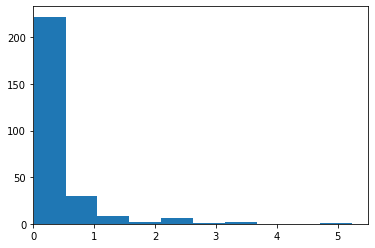

In [91]:
plt.hist(df_clean[df_clean.Year.isnull()].Global_Sales)
plt.xlim((0, 5.5))
plt.show()

In [92]:
year_null = df_clean[df_clean.Year.isnull()]
len(year_null[year_null.Global_Sales>1])

22

In [93]:
high_sales = year_null[year_null.Global_Sales>1]  # Global Sales가 1 이상인 것만 따로 찾아서 작성하기(구글)
high_sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
2130,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
3031,Donkey Kong Land III,GB,NaN,Platform,Nintendo,0.68,0.31,0.00,0.04,1.03
3347,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
3562,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,Unknown,1.57,1.02,0.00,0.41,3.00
3942,Legacy of Kain: Soul Reaver,PS,NaN,Action,Eidos Interactive,0.58,0.40,0.00,0.07,1.05
4181,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11
5674,Hitman 2: Silent Assassin,XB,NaN,Action,Eidos Interactive,0.76,0.38,0.00,0.05,1.19
5720,Adventure,2600,NaN,Adventure,Atari,1.21,0.08,0.00,0.01,1.30
6949,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.24


In [94]:
index_year_dic = {31: 2009.0, 2130: 2006.0, 3031: 1997.0, 3347: 2008.0, 3562: 2005.0, 3942: 1999.0, 4181: 2009.0, 5674: 2002.0, 5720: 1980.0, 6949: 2003.0, 8529: 2008.0, 9237: 2011.0, 9955: 2008.0, 10773: 2012.0, 10962: 2003.0, 11306: 1998.0, 12855: 2007.0, 12983: 2010.0, 13324: 2001.0, 13749: 2002.0, 14762: 1977.0, 16272: 1978.0}
index = list(high_sales.index)
for i in index:
  df_clean.loc[i, 'Year'] = index_year_dic[i]
df_clean.loc[index].head() # 잘 대체된 것을 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
31,Rock Band,X360,2009.0,Misc,Electronic Arts,1.93,0.34,0.0,0.21,2.48
2130,Call of Duty 3,Wii,2006.0,Shooter,Activision,1.19,0.84,0.0,0.23,2.26
3031,Donkey Kong Land III,GB,1997.0,Platform,Nintendo,0.68,0.31,0.0,0.04,1.03
3347,LEGO Batman: The Videogame,Wii,2008.0,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.0,0.29,3.17
3562,wwe Smackdown vs. Raw 2006,PS2,2005.0,Fighting,Unknown,1.57,1.02,0.0,0.41,3.00


In [95]:
# 이외의 Year 결측치는 제거
drop_index = df_clean[df_clean.Year.isnull()].index
df_clean = df_clean.drop(drop_index).reset_index(drop=True)

In [96]:
df_clean.isnull().sum() # 결측치 제거 완료

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

* **Year: 정수형으로 바꾸기**

In [97]:
df_clean['Year'] = df_clean.Year.astype(int)
df_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [98]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16345 entries, 0 to 16344
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16345 non-null  object 
 1   Platform      16345 non-null  object 
 2   Year          16345 non-null  int64  
 3   Genre         16345 non-null  object 
 4   Publisher     16345 non-null  object 
 5   NA_Sales      16345 non-null  float64
 6   EU_Sales      16345 non-null  float64
 7   JP_Sales      16345 non-null  float64
 8   Other_Sales   16345 non-null  float64
 9   Global_Sales  16345 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.2+ MB


In [99]:
# 휴대용(portable), 거치용(home), PC로 나누기
portable = ['DS', '3DS', 'PSP', 'GB', 'GBA', 'PSV', 'WS', 'GG', 'WiiU']
home = ['Wii', 'GC', 'XB', 'X360', 'PS', 'PS2', 'PS3', '2600', 'NES', 'SNES', 'DC', 'N64', 'XOne', 'GEN', 'SCD', 'NG', 'TG16', '3DO', 'PDFX', 'SAT']
pc = ['PC']

# **2. 데이터 분석(Data Analysis)**

데이터 분석을 쉽게 하기 위해 새로운 컬럼을 생성한다.
<br>
위에서 sales 값의 합계 Global_Sales를 포함하여, 휴대용/거치용/PC 카테고리, 매출 순위, 

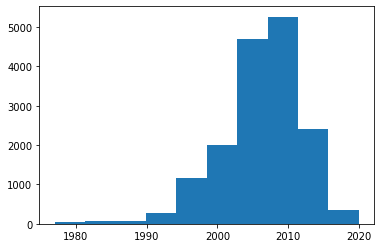

In [100]:
plt.hist(df_clean.Year);

1. 지역에 따라서 선호하는 게임 장르가 다를까
<br>
지역별, 장르별 groupby

In [139]:
# 장르별 지역의 출고량 비교
sales_include_sum = sales + ['Global_Sales']  # 기존 sales에서 전체 Global_Sales 포함한 리스트
group_data = df_clean.groupby('Genre')[sales_include_sum]
group_sum = group_data.sum().T
group_sum

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,869.04,105.42,222.31,407.46,446.62,122.01,357.53,326.50,579.28,181.78,675.75,67.89
EU_Sales,519.91,64.05,101.02,215.19,201.43,50.53,236.78,187.58,312.23,113.20,374.51,44.94
JP_Sales,158.66,52.01,87.15,106.67,130.65,56.68,56.61,350.29,38.18,63.54,134.81,48.90
Other_Sales,185.97,16.78,36.60,75.00,51.54,12.47,76.84,59.38,102.40,31.36,133.97,11.23
Global_Sales,1733.58,238.26,447.08,804.32,830.24,241.69,727.76,923.75,1032.09,389.88,1319.04,172.96


In [113]:
group_data.size() # 장르별 데이터 개수

Genre
Action          3260
Adventure       1278
Fighting         837
Misc            1714
Platform         876
Puzzle           571
Racing          1227
Role-Playing    1471
Shooter         1284
Simulation       851
Sports          2306
Strategy         670
dtype: int64

In [202]:
genre_list = list(group_sum.columns) # 장르 리스트

ratio = group_sum.copy()  # index: 지역, column: 장르
ratio['Sum'] = 0

# for genre in genre_list:
#   for region in sales_include_sum:
#     ratio.loc[region, 'Sum'] += ratio.loc[region, genre]
ratio['Sum'] = ratio.sum(axis=1)  # 위의 코드와 동일한 기능


# for region in sales:
#   ratio[region] = group_sum.loc[genre_list, region] / group_sum['Global_Sales'][genre_list] * 100
for region in sales_include_sum:
  ratio.loc[region, genre_list] = ratio.loc[region, genre_list] / ratio.loc[region, 'Sum'] * 100

ratio = ratio.drop('Sum', axis=1)

ratio # 지역별 장르 비율

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,19.924844,2.417008,5.096994,9.342006,10.239844,2.797374,8.197240,7.485802,13.281395,4.167746,15.493203,1.556542
EU_Sales,21.471729,2.645197,4.172018,8.887118,8.318844,2.086835,9.778762,7.746854,12.894766,4.675039,15.466864,1.855974
JP_Sales,12.355254,4.050150,6.786590,8.306662,10.174045,4.413815,4.408364,27.277966,2.973173,4.948020,10.497995,3.807966
Other_Sales,23.435492,2.114575,4.612244,9.451319,6.494947,1.571439,9.683192,7.482925,12.904201,3.951912,16.882577,1.415178
Global_Sales,19.564930,2.688968,5.045679,9.077438,9.369967,2.727678,8.213393,10.425307,11.648017,4.400129,14.886493,1.952001


In [104]:
# 장르마다 연도별 합계
data_test = df_clean.groupby(['Year', 'Genre'])
data_test.sum()

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Year Genre                                                                
1977 Action            1.17      0.07      0.00         0.01          1.25
1978 Shooter           2.36      0.14      0.00         0.03          2.53
1980 Action            0.32      0.02      0.00         0.00          0.34
     Adventure         1.21      0.08      0.00         0.01          1.30
     Fighting          0.72      0.04      0.00         0.01          0.77
     Misc              2.53      0.15      0.00         0.02          2.70
     Shooter           6.56      0.43      0.00         0.08          7.07
     Sports            0.46      0.03      0.00         0.01          0.50
1981 Action           13.86      0.81      0.00         0.12         14.79
     Platform          6.47      0.37      0.00         0.08          6.92
     Puzzle            2.09      0.13      0.00         0.03          2.25
     Racing            0.45      0.03      0.00         0.00          0.48
     Shooter           9.37      0.56      0.00         0.09         10.02
     Simulation        0.42      0.02      0.00         0.00          0.44
     Sports            0.74      0.04      0.00         0.00          0.78
1982 Action            6.07      0.38      0.00         0.05          6.50
     Misc              0.81      0.05      0.00         0.01          0.87
     Platform          4.69      0.28      0.00         0.06          5.03
     Puzzle            9.35      0.58      0.00         0.11         10.04
     Racing            1.47      0.09      0.00         0.01          1.57
     Shooter           3.55      0.21      0.00         0.05          3.81
     Sports            0.98      0.06      0.00         0.02          1.06
1983 Action            2.67      0.17      0.00         0.02          2.86
     Adventure         0.38      0.02      0.00         0.00          0.40
     Misc              0.01      0.00      2.13         0.00          2.14
     Platform          2.80      0.43      3.62         0.08          6.93
     Puzzle            0.72      0.05      0.00         0.01          0.78
     Shooter           0.45      0.03      0.00         0.01          0.49
     Sports            0.73      0.10      2.35         0.02          3.20
1984 Action            0.80      0.19      0.83         0.03          1.85
     Misc              0.00      0.00      1.45         0.00          1.45
     Platform          0.00      0.00      0.69         0.00          0.69
     Puzzle            0.69      0.18      2.23         0.04          3.14
     Racing            2.30      0.49      3.09         0.07          5.95
     Shooter          27.79      0.85      1.96         0.50         31.10
     Sports            1.70      0.39      4.02         0.06          6.17
1985 Action            1.64      0.38      1.44         0.06          3.52
     Fighting          0.00      0.00      1.05         0.00          1.05
     Platform         29.93      3.77      8.67         0.80         43.17
     Puzzle            1.33      0.19      1.66         0.03          3.21
     Shooter           0.65      0.14      0.21         0.00          1.00
     Simulation        0.00      0.03      0.00         0.01          0.04
     Sports            0.18      0.23      1.53         0.02          1.96
1986 Action            6.52      1.66      5.31         0.25         13.74
     Platform          1.07      0.18      8.11         0.03          9.39
     Racing            1.13      0.37      0.41         0.05          1.96
     Role-Playing      0.49      0.00      0.52         1.51          2.52
     Shooter           0.94      0.16      2.77         0.02          3.89
     Sports            2.35      0.47      2.69         0.07          5.58
1987 Action            1.04      0.06      0.00         0.01          1.11
     Adventure         2.19      0.50      1.61         0.08          4.38
     Fighting          2.80      0.65      1